In [2]:
import numpy as np
import pandas as pd
#from sklearn.linear_model import LogisticRegression - using statsmodels because that produces a readable summary of coefs etc.
from statsmodels.api import Logit, add_constant
from sklearn import metrics
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels,
                yticklabels=labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    return matrix

In [ ]:
#DATA_PATH = '/content/drive/MyDrive/capstone/data'
DATA_PATH = 'C:/Users/stuar/OneDrive/Documents/Capstone/data'

In [ ]:
features_df = pd.read_csv(DATA_PATH + '/features_df.csv')
features_df['date'] = pd.to_datetime(features_df['GAME_DATE'])

In [ ]:
features_df

,GAME_DATE,HOME_PLAYER_1_FG_PCT,HOME_PLAYER_1_FG3_PCT,HOME_PLAYER_1_FT_PCT,HOME_PLAYER_1_MIN_SAVG,HOME_PLAYER_1_POSS_SAVG,HOME_PLAYER_1_OREB_PAVG,HOME_PLAYER_1_DREB_PAVG,HOME_PLAYER_1_REB_PAVG,HOME_PLAYER_1_AST_PAVG,...,ROAD_PLAYER_9_PTS_PAINT_PAVG,ROAD_PLAYER_9_OPP_PTS_OFF_TOV_PAVG,ROAD_PLAYER_9_OPP_PTS_2ND_CHANCE_PAVG,ROAD_PLAYER_9_OPP_PTS_FB_PAVG,ROAD_PLAYER_9_OPP_PTS_PAINT_PAVG,ROAD_PLAYER_9_BLKA_PAVG,ROAD_PLAYER_9_PFD_PAVG,ROAD_PLAYER_9_PLAYER_NAME,ROAD_PLAYER_9_PERCENT_PLAY,date
0,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Corey Maggette,33.888889,2000-10-31
1,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mateen Cleaves,23.645833,2000-10-31
2,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gerard King,27.743056,2000-10-31
3,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Todd MacCulloch,16.111111,2000-10-31
4,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hersey Hawkins,12.291667,2000-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26760,2021-05-16,43.525180,34.005038,88.095238,34.004839,71.387097,0.008586,0.046091,0.054677,0.132174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-16
26761,2021-05-16,40.875310,31.923077,75.735294,32.056103,68.802817,0.012078,0.056704,0.068782,0.042375,...,0.030357,0.141964,0.112500,0.100893,0.423214,0.006250,0.028571,Nicolo Melli,31.284722,2021-05-16
26762,2021-05-16,36.644951,33.226837,74.814815,27.568490,59.343750,0.006582,0.048973,0.055556,0.058715,...,0.096724,0.156786,0.140406,0.125195,0.491420,0.013261,0.028861,Terance Mann,48.368056,2021-05-16
26763,2021-05-16,43.589744,27.184466,80.000000,15.011944,31.500000,0.005820,0.045503,0.051323,0.060317,...,0.033981,0.179612,0.084951,0.114078,0.398058,0.007282,0.009709,Sindarius Thornwell,39.826389,2021-05-16


In [ ]:
features_df.shape

(26765, 651)

In [ ]:
features_df.describe()

,HOME_PLAYER_1_FG_PCT,HOME_PLAYER_1_FG3_PCT,HOME_PLAYER_1_FT_PCT,HOME_PLAYER_1_MIN_SAVG,HOME_PLAYER_1_POSS_SAVG,HOME_PLAYER_1_OREB_PAVG,HOME_PLAYER_1_DREB_PAVG,HOME_PLAYER_1_REB_PAVG,HOME_PLAYER_1_AST_PAVG,HOME_PLAYER_1_STL_PAVG,...,ROAD_PLAYER_9_PTS_2ND_CHANCE_PAVG,ROAD_PLAYER_9_PTS_FB_PAVG,ROAD_PLAYER_9_PTS_PAINT_PAVG,ROAD_PLAYER_9_OPP_PTS_OFF_TOV_PAVG,ROAD_PLAYER_9_OPP_PTS_2ND_CHANCE_PAVG,ROAD_PLAYER_9_OPP_PTS_FB_PAVG,ROAD_PLAYER_9_OPP_PTS_PAINT_PAVG,ROAD_PLAYER_9_BLKA_PAVG,ROAD_PLAYER_9_PFD_PAVG,ROAD_PLAYER_9_PERCENT_PLAY
count,26369.000000,26281.000000,26299.000000,26369.000000,26369.000000,26369.000000,26369.000000,26369.000000,26369.000000,26369.000000,...,25027.000000,25027.000000,25027.000000,25027.000000,2.502800e+04,25027.000000,25027.000000,25027.000000,25027.000000,25556.000000
mean,40.650334,32.154883,75.820678,31.150801,62.120565,0.010637,0.044842,0.055451,0.083515,0.018882,...,0.025606,0.019312,0.070246,0.175828,inf,0.128723,0.410139,0.009725,0.026970,25.281421
std,5.737537,8.911257,12.206642,6.244024,12.435152,0.006254,0.014672,0.017813,0.030450,0.007262,...,0.020790,0.017269,0.043615,0.048956,NaN,0.043169,0.077500,0.008406,0.024195,10.433455
min,0.000000,0.000000,0.000000,1.233333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.031443
25%,38.248848,28.813559,71.428571,27.837879,55.466667,0.006625,0.035955,0.044299,0.064103,0.014041,...,0.012485,0.006849,0.039103,0.154611,1.188661e-01,0.107798,0.373464,0.004765,0.000350,17.708333
50%,41.444270,33.600000,78.082192,32.448485,64.703704,0.009212,0.042584,0.052447,0.083356,0.017993,...,0.021779,0.016515,0.064777,0.173979,1.361137e-01,0.128065,0.414343,0.008721,0.026316,25.537307
75%,44.117647,37.344398,83.333333,35.490000,70.867647,0.013216,0.050580,0.062914,0.102519,0.022799,...,0.035233,0.027823,0.095072,0.195000,1.531532e-01,0.147738,0.450554,0.012987,0.041322,32.810222
max,58.741259,100.000000,100.000000,48.233333,98.000000,0.078261,0.177419,0.205128,0.276923,0.103448,...,0.500000,0.333333,0.666667,1.166667,inf,1.000000,2.000000,0.333333,1.000000,67.743056


In [ ]:
features_df['WIN']

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
26760    1.0
26761    1.0
26762    1.0
26763    1.0
26764    0.0
Name: WIN, Length: 26765, dtype: float64

In [ ]:
type(features_df.iloc[0]['GAME_DATE'])

str

In [ ]:
features_df.columns[:100]

Index(['GAME_DATE', 'HOME_PLAYER_1_FG_PCT', 'HOME_PLAYER_1_FG3_PCT',
       'HOME_PLAYER_1_FT_PCT', 'HOME_PLAYER_1_MIN_SAVG',
       'HOME_PLAYER_1_POSS_SAVG', 'HOME_PLAYER_1_OREB_PAVG',
       'HOME_PLAYER_1_DREB_PAVG', 'HOME_PLAYER_1_REB_PAVG',
       'HOME_PLAYER_1_AST_PAVG', 'HOME_PLAYER_1_STL_PAVG',
       'HOME_PLAYER_1_BLK_PAVG', 'HOME_PLAYER_1_TOV_PAVG',
       'HOME_PLAYER_1_PF_PAVG', 'HOME_PLAYER_1_PTS_PAVG',
       'HOME_PLAYER_1_FTA_PAVG', 'HOME_PLAYER_1_AST_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_AST_RATIO_ADJ_PAVG', 'HOME_PLAYER_1_OFF_RATING_ADJ_PAVG',
       'HOME_PLAYER_1_DEF_RATING_ADJ_PAVG', 'HOME_PLAYER_1_USG_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_OREB_PCT_ADJ_PAVG', 'HOME_PLAYER_1_DREB_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_REB_PCT_ADJ_PAVG', 'HOME_PLAYER_1_TM_TOV_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_PTS_OFF_TOV_PAVG', 'HOME_PLAYER_1_PTS_2ND_CHANCE_PAVG',
       'HOME_PLAYER_1_PTS_FB_PAVG', 'HOME_PLAYER_1_PTS_PAINT_PAVG',
       'HOME_PLAYER_1_OPP_PTS_OFF_TOV_PAVG',
      

In [ ]:
features_df2 = features_df.drop(['GAME_ID','GAME_DATE', 
    'HOME_PLAYER_1_MIN_SAVG', 'HOME_PLAYER_1_POSS_SAVG', 'HOME_PLAYER_1_PLAYER_NAME', 'HOME_PLAYER_1_PERCENT_PLAY', 'HOME_PLAYER_1_FG3_PCT', 'HOME_PLAYER_1_PTS_PAVG', 'HOME_PLAYER_1_REB_PAVG',
    'HOME_PLAYER_2_MIN_SAVG', 'HOME_PLAYER_2_POSS_SAVG', 'HOME_PLAYER_2_PLAYER_NAME', 'HOME_PLAYER_2_PERCENT_PLAY', 'HOME_PLAYER_2_FG3_PCT', 'HOME_PLAYER_2_PTS_PAVG', 'HOME_PLAYER_2_REB_PAVG',
    'HOME_PLAYER_3_MIN_SAVG', 'HOME_PLAYER_3_POSS_SAVG', 'HOME_PLAYER_3_PLAYER_NAME', 'HOME_PLAYER_3_PERCENT_PLAY', 'HOME_PLAYER_3_FG3_PCT', 'HOME_PLAYER_3_PTS_PAVG', 'HOME_PLAYER_3_REB_PAVG',
    'HOME_PLAYER_4_MIN_SAVG', 'HOME_PLAYER_4_POSS_SAVG', 'HOME_PLAYER_4_PLAYER_NAME', 'HOME_PLAYER_4_PERCENT_PLAY', 'HOME_PLAYER_4_FG3_PCT', 'HOME_PLAYER_4_PTS_PAVG', 'HOME_PLAYER_4_REB_PAVG',
    'HOME_PLAYER_5_MIN_SAVG', 'HOME_PLAYER_5_POSS_SAVG', 'HOME_PLAYER_5_PLAYER_NAME', 'HOME_PLAYER_5_PERCENT_PLAY', 'HOME_PLAYER_5_FG3_PCT', 'HOME_PLAYER_5_PTS_PAVG', 'HOME_PLAYER_5_REB_PAVG',
    'HOME_PLAYER_6_MIN_SAVG', 'HOME_PLAYER_6_POSS_SAVG', 'HOME_PLAYER_6_PLAYER_NAME', 'HOME_PLAYER_6_PERCENT_PLAY', 'HOME_PLAYER_6_FG3_PCT', 'HOME_PLAYER_6_PTS_PAVG', 'HOME_PLAYER_6_REB_PAVG',
    'HOME_PLAYER_7_MIN_SAVG', 'HOME_PLAYER_7_POSS_SAVG', 'HOME_PLAYER_7_PLAYER_NAME', 'HOME_PLAYER_7_PERCENT_PLAY', 'HOME_PLAYER_7_FG3_PCT', 'HOME_PLAYER_7_PTS_PAVG', 'HOME_PLAYER_7_REB_PAVG',
    'HOME_PLAYER_8_MIN_SAVG', 'HOME_PLAYER_8_POSS_SAVG', 'HOME_PLAYER_8_PLAYER_NAME', 'HOME_PLAYER_8_PERCENT_PLAY', 'HOME_PLAYER_8_FG3_PCT', 'HOME_PLAYER_8_PTS_PAVG', 'HOME_PLAYER_8_REB_PAVG',
    'HOME_PLAYER_9_MIN_SAVG', 'HOME_PLAYER_9_POSS_SAVG', 'HOME_PLAYER_9_PLAYER_NAME', 'HOME_PLAYER_9_PERCENT_PLAY', 'HOME_PLAYER_9_FG3_PCT', 'HOME_PLAYER_9_PTS_PAVG', 'HOME_PLAYER_9_REB_PAVG',
    'ROAD_PLAYER_1_MIN_SAVG', 'ROAD_PLAYER_1_POSS_SAVG', 'ROAD_PLAYER_1_PLAYER_NAME', 'ROAD_PLAYER_1_PERCENT_PLAY', 'ROAD_PLAYER_1_FG3_PCT', 'ROAD_PLAYER_1_PTS_PAVG', 'ROAD_PLAYER_1_REB_PAVG',
    'ROAD_PLAYER_2_MIN_SAVG', 'ROAD_PLAYER_2_POSS_SAVG', 'ROAD_PLAYER_2_PLAYER_NAME', 'ROAD_PLAYER_2_PERCENT_PLAY', 'ROAD_PLAYER_2_FG3_PCT', 'ROAD_PLAYER_2_PTS_PAVG', 'ROAD_PLAYER_2_REB_PAVG',
    'ROAD_PLAYER_3_MIN_SAVG', 'ROAD_PLAYER_3_POSS_SAVG', 'ROAD_PLAYER_3_PLAYER_NAME', 'ROAD_PLAYER_3_PERCENT_PLAY', 'ROAD_PLAYER_3_FG3_PCT', 'ROAD_PLAYER_3_PTS_PAVG', 'ROAD_PLAYER_3_REB_PAVG',
    'ROAD_PLAYER_4_MIN_SAVG', 'ROAD_PLAYER_4_POSS_SAVG', 'ROAD_PLAYER_4_PLAYER_NAME', 'ROAD_PLAYER_4_PERCENT_PLAY', 'ROAD_PLAYER_4_FG3_PCT', 'ROAD_PLAYER_4_PTS_PAVG', 'ROAD_PLAYER_4_REB_PAVG',
    'ROAD_PLAYER_5_MIN_SAVG', 'ROAD_PLAYER_5_POSS_SAVG', 'ROAD_PLAYER_5_PLAYER_NAME', 'ROAD_PLAYER_5_PERCENT_PLAY', 'ROAD_PLAYER_5_FG3_PCT', 'ROAD_PLAYER_5_PTS_PAVG', 'ROAD_PLAYER_5_REB_PAVG',
    'ROAD_PLAYER_6_MIN_SAVG', 'ROAD_PLAYER_6_POSS_SAVG', 'ROAD_PLAYER_6_PLAYER_NAME', 'ROAD_PLAYER_6_PERCENT_PLAY', 'ROAD_PLAYER_6_FG3_PCT', 'ROAD_PLAYER_6_PTS_PAVG', 'ROAD_PLAYER_6_REB_PAVG',
    'ROAD_PLAYER_7_MIN_SAVG', 'ROAD_PLAYER_7_POSS_SAVG', 'ROAD_PLAYER_7_PLAYER_NAME', 'ROAD_PLAYER_7_PERCENT_PLAY', 'ROAD_PLAYER_7_FG3_PCT', 'ROAD_PLAYER_7_PTS_PAVG', 'ROAD_PLAYER_7_REB_PAVG',
    'ROAD_PLAYER_8_MIN_SAVG', 'ROAD_PLAYER_8_POSS_SAVG', 'ROAD_PLAYER_8_PLAYER_NAME', 'ROAD_PLAYER_8_PERCENT_PLAY', 'ROAD_PLAYER_8_FG3_PCT', 'ROAD_PLAYER_8_PTS_PAVG', 'ROAD_PLAYER_8_REB_PAVG',
    'ROAD_PLAYER_9_MIN_SAVG', 'ROAD_PLAYER_9_POSS_SAVG', 'ROAD_PLAYER_9_PLAYER_NAME', 'ROAD_PLAYER_9_PERCENT_PLAY', 'ROAD_PLAYER_9_FG3_PCT', 'ROAD_PLAYER_9_PTS_PAVG', 'ROAD_PLAYER_9_REB_PAVG'
                                ], axis=1).dropna()

In [ ]:
features_df.shape

(26765, 652)

In [ ]:
features_df2.shape

(19752, 524)

In [ ]:

print(len(features_df[features_df['HOME_PLAYER_1_PLAYER_NAME'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_1_FG_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_1_FG3_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_1_FT_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_1_MIN_SAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_1_POSS_SAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_1_OREB_PAVG'].isna()]))
print('\n')
print(len(features_df[features_df['HOME_PLAYER_2_PLAYER_NAME'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_2_FG_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_2_FG3_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_2_FT_PCT'].isna()]))
print('\n')
print(len(features_df[features_df['HOME_PLAYER_3_PLAYER_NAME'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_3_FG_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_3_FG3_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_3_FT_PCT'].isna()]))
print('\n')
print(len(features_df[features_df['HOME_PLAYER_4_PLAYER_NAME'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_4_FG_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_4_FG3_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_4_FT_PCT'].isna()]))
print('\n')
print(len(features_df[features_df['HOME_PLAYER_5_PLAYER_NAME'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_5_FG_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_5_FG3_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_5_FT_PCT'].isna()]))
print('\n')
print(len(features_df[features_df['HOME_PLAYER_6_PLAYER_NAME'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_6_FG_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_6_FG3_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_6_FT_PCT'].isna()]))
print('\n')
print(len(features_df[features_df['HOME_PLAYER_7_PLAYER_NAME'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_7_FG_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_7_FG3_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_7_FT_PCT'].isna()]))
print('\n')
print(len(features_df[features_df['HOME_PLAYER_8_PLAYER_NAME'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_8_FG_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_8_FG3_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_8_FT_PCT'].isna()]))
print('\n')
print(len(features_df[features_df['HOME_PLAYER_9_PLAYER_NAME'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_FG_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_FG3_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_FT_PCT'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_MIN_SAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_POSS_SAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_OREB_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_DREB_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_REB_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_AST_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_STL_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_BLK_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_TOV_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_PF_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_PTS_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_FTA_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_AST_PCT_ADJ_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_AST_RATIO_ADJ_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_OFF_RATING_ADJ_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_DEF_RATING_ADJ_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_USG_PCT_ADJ_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_OREB_PCT_ADJ_PAVG'].isna()]))
print(len(features_df[features_df['HOME_PLAYER_9_DREB_PCT_ADJ_PAVG'].isna()]))


0
396
484
466
396
396
396


0
389
493
505


0
382
1573
500


0
396
3273
470


0
393
11450
527


0
439
2588
630


3
489
3826
842


61
637
4880
1251


1269
1906
7221
2818
1880
1880
1886
1886
1887
1886
1886
1886
1886
1885
1886
1886
1886
1886
1886
1886
1886
1886
1886


In [ ]:
#cutoff_date = datetime.strptime('2014-04-16', '%Y-%m-%d').date()
cutoff_date = pd.to_datetime('2014-04-16')
cutoff_date

Timestamp('2014-04-16 00:00:00')

In [ ]:
train = features_df2[features_df2['date'] <= cutoff_date]
test = features_df2[features_df2['date'] > cutoff_date]

x_train = train.drop(['date','WIN'], axis=1)
y_train = train['WIN']
x_test = test.drop(['date','WIN'], axis=1)
y_test = test['WIN']

In [ ]:
x_train.shape

(13049, 522)

In [ ]:
x_test.shape

(6703, 522)

In [ ]:
log_reg = Logit(y_train, add_constant(x_train)).fit()

Optimization terminated successfully.
         Current function value: 0.561274
         Iterations 7


In [ ]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    WIN   No. Observations:                13049
Model:                          Logit   Df Residuals:                    12526
Method:                           MLE   Df Model:                          522
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.1635
Time:                        18:15:24   Log-Likelihood:                -7324.1
converged:                       True   LL-Null:                       -8755.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.3503      2.223      1.057      0.290      -2.007       6.708
HOME_PLAYER_1_FG_PCT                      0.0117      0.007      1.602      0.109      -0.003       0.026
HOME_PLAYER_1_FT_PCT                     -0.0061      0.003     -2.213      0.027      -0.012      -0.001
HOME_PLAYER_1_OREB_PAVG                 -56.0123     34.725     -1.613      0.107    -124.071      12.047
HOME_PLAYER_1_DREB_PAVG                  -2.5618     19.583     -0.131      0.896     -40.943      35.819
HOME_PLAYER_1_AST_PAVG                   -0.0935      7.703     -0.012      0.990     -15.190      15.003
HOME_PLAYER_1_STL_PAVG                   -0.5041      4.113     -0.123      0.902      -8.565       7.557
HOME_PLAYER_1_BLK_PAVG                   -4.5225      8.718     -0.519      0.604     -21.610      12.565
HOME_PLAYER_1_TOV_PAVG                    0.0412     10.348      0.004      0.997     -20.240      20.322
HOME_PLAYER_1_PF_PAVG                    -6.6539      2.565     -2.594      0.009     -11.682      -1.626
HOME_PLAYER_1_FTA_PAVG                   -2.2000      1.829     -1.203      0.229      -5.785       1.385
HOME_PLAYER_1_AST_PCT_ADJ_PAVG            1.2214      2.215      0.551      0.581      -3.121       5.564
HOME_PLAYER_1_AST_RATIO_ADJ_PAVG         -0.0037      0.014     -0.262      0.793      -0.031       0.024
HOME_PLAYER_1_OFF_RATING_ADJ_PAVG         0.0219      0.011      2.037      0.042       0.001       0.043
HOME_PLAYER_1_DEF_RATING_ADJ_PAVG        -0.0250      0.012     -2.120      0.034      -0.048      -0.002
HOME_PLAYER_1_USG_PCT_ADJ_PAVG            0.4419      2.153      0.205      0.837      -3.778       4.662
HOME_PLAYER_1_OREB_PCT_ADJ_PAVG          41.6408     21.413      1.945      0.052      -0.327      83.609
HOME_PLAYER_1_DREB_PCT_ADJ_PAVG           5.6821     10.261      0.554      0.580     -14.428      25.792
HOME_PLAYER_1_REB_PCT_ADJ_PAVG          -10.3617     27.812     -0.373      0.709     -64.873      44.149
HOME_PLAYER_1_TM_TOV_PCT_ADJ_PAVG         0.0207      0.031      0.669      0.503      -0.040       0.081
HOME_PLAYER_1_PTS_OFF_TOV_PAVG           -0.5618      3.065     -0.183      0.855      -6.569       5.445
HOME_PLAYER_1_PTS_2ND_CHANCE_PAVG         0.2650      4.069      0.065      0.948      -7.709       8.239
HOME_PLAYER_1_PTS_FB_PAVG                 3.2142      2.163      1.486      0.137      -1.025       7.453
HOME_PLAYER_1_PTS_PAINT_PAVG              1.1363      1.446      0.786      0.432      -1.698       3.970
HOME_PLAYER_1_OPP_PTS_OFF_TOV_PAVG       -0.6927      1.988     -0.349      0.727      -4.588       3.203
HOME_PLAYER_1_OPP_PTS_2ND_CHANCE_PAVG     0.4175      2.195      0.190      0.849      -3.885       4.720
HOME_PLAYER_1_OPP_PTS_FB_PAVG             5.6612      1.936      2.925      0.003       1.867       9.455
HOME_PLAYER_1_OPP_PTS_PAINT_PAVG         -1.9013      1.277  

In [ ]:
yhat = log_reg.predict(add_constant(x_test))

In [ ]:
yhat >= 0.5

18180     True
18185    False
18189     True
18192     True
18193     True
         ...  
26758    False
26759     True
26761     True
26762    False
26763     True
Length: 6703, dtype: bool

In [ ]:
y_test

18180    1.0
18185    0.0
18189    0.0
18192    1.0
18193    1.0
        ... 
26758    0.0
26759    0.0
26761    1.0
26762    1.0
26763    1.0
Name: WIN, Length: 6703, dtype: float64

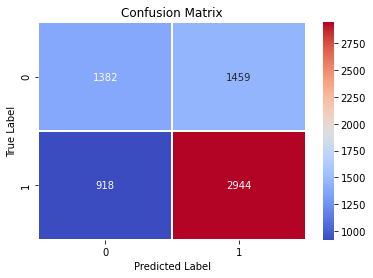

array([[1382, 1459],
       [ 918, 2944]], dtype=int64)

In [ ]:
labels = ["0", "1"]
show_confusion_matrix(y_test, yhat >= 0.5)

In [ ]:
print(metrics.classification_report(y_test, yhat >= 0.5))

              precision    recall  f1-score   support

         0.0       0.60      0.49      0.54      2841
         1.0       0.67      0.76      0.71      3862

    accuracy                           0.65      6703
   macro avg       0.63      0.62      0.63      6703
weighted avg       0.64      0.65      0.64      6703

